### 이 파일이 이미지로 점수 예측하는 코드입니다. 

# 0. 실행할 부분

In [1]:
# torchvision 관련 라이브러리 import

from torchvision import utils
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

/nfs/home/dailyavenger/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip install jsonlines
!pip install pdf2image

In [3]:
#@title

import numpy as np

import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.models as models



In [4]:
#@title
from torch.utils.data import DataLoader

from torchvision import transforms
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
import glob
from PIL import Image
import jsonlines
import os
from tqdm import tqdm

#1. 데이터셋 로드


In [5]:
#@title
import cv2,io

class PaperDataSet(Dataset):
    def __init__(self, overall_image_path, transform=None):
        print("initialize data sets")
        self.transform = transform
        rating_dict = {}
        self.image_list = list()
        self.score_list = list()
        years = ["2021"]
        for year in years:
            cnt = 0
            year_image_path = overall_image_path
            # year_image_path = overall_image_path+"iclr"+year+"/"
            # *********** 경로 수정 ***********
            with jsonlines.open(f"iclr{year}_metadata.jsonl") as read_file:
                for line in read_file.iter():
                    rating_dict[line['forum']] = line['rating']
            input_paths = os.listdir(year_image_path)
            #ignore_5 = True

            for one_file_image_path in tqdm(input_paths, desc="make data set"):
               
                image_path = year_image_path + one_file_image_path + "/"
                rating = rating_dict[one_file_image_path]
                #iter=1

                #rating_int = int(rating)
        
                #if rating_int==3:
                  #iter = 3
                #elif rating_int==7:
                  #iter = 3                          
                #elif rating_int==5:
                  #if ignore_5:
                    #iter = 0
                    #ignore_5 = False
                  #else:
                    #ignore_5 = True
                
                #if(iter==3):
                  #a=glob.glob(image_path + "*.bin")
                  
                  #cnt=0
                  #output_folder="./temp2/"+one_file_image_path
                  #os.mkdir(output_folder)
                  #for b in a:
                    #cnt+=1
                    #with open(b, 'rb') as f:
                      #data=f.read()
                    #encoded_img=np.fromstring(data,dtype=np.uint8)
                    #img0=cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
                    #img00=cv2.flip(img0,0)
                    #img01=cv2.flip(img0,1)
                    #resized_cv0=cv2.resize(img00, dsize=(224,224),interpolation=cv2.INTER_AREA)
                    #resized_cv1=cv2.resize(img01, dsize=(224,224),interpolation=cv2.INTER_AREA)
                    #binary_cv0=cv2.imencode('.JPG', resized_cv0)[1].tobytes()
                    #binary_cv1=cv2.imencode('.JPG', resized_cv1)[1].tobytes()
                    
                    #binary_file0=f'./temp2/'+one_file_image_path+f'/{cnt+10}.bin'
                    #with open(binary_file0, "wb") as f:
                      #f.write(binary_cv0)
                    #binary_file1=f'./temp2/'+one_file_image_path+f'/{cnt+20}.bin'
                    #with open(binary_file1, "wb") as f:
                      #f.write(binary_cv1)
                  #before_add_size = len(self.image_list)
                  #self.image_list.extend(glob.glob("./temp2/"+one_file_image_path +"/"+ "*.bin")) # glob: 폴더 내의 파일 찾아줌   
                  #self.score_list.extend([rating] * (len(self.image_list)-before_add_size))  

               
                before_add_size = len(self.image_list)
                self.image_list.extend(glob.glob(image_path + "*.bin")) # glob: 폴더 내의 파일 찾아줌   
                self.score_list.extend([rating] * (len(self.image_list)-before_add_size))
                

    

    def __len__(self):
        return len(self.image_list)


    def __getitem__(self, idx):
        image_path = self.image_list[idx]
        label = self.score_list[idx]
        binary_file = image_path   # binary_file = dataset/image/iclr2021/_0kaDkv3dVf/3.bin 
        with open(binary_file, 'rb') as f:
            data = f.read()
        encoded_img = np.fromstring(data, dtype=np.uint8)
        img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR) 

          

        if self.transform is not None:
            img = self.transform(img)
        
        return img, label
    #def get__score_list(self):
        #return self.score_list

In [6]:
image_path =  "../wngusrud27/dataset/image/iclr2021_cut/" 
image_path2 =  "temp/" 
dataset_file_name = 'iclr2021_dataset.pt'

In [7]:
#zip_path = image_path + "iclr2021_binary.zip"

#!mkdir binary

#!cp {zip_path} ./iclr2021.zip

#!unzip -q ./iclr2021.zip -d ./binary/ 

#!rm ./iclr2021.zip

In [8]:
def make_save_data_set(image_path2, dataset_file_name):
  print("start to make data set")
  transform = transforms.Compose([
      transforms.ToTensor(),
  ])

  dataset = PaperDataSet(image_path, transform=transform)
  print(f"data set length: {dataset.__len__()}")

  torch.save(dataset, image_path2 + dataset_file_name)
  print("save data sets")

In [9]:
#image_path =  "./binary/" 
make_save_data_set(image_path2, dataset_file_name)
# data_set_usage_ex(dataset_file_name)

start to make data set
initialize data sets


make data set:   0%|          | 0/2594 [00:00<?, ?it/s]/tmp/ipykernel_3809571/3714324604.py:52: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  encoded_img=np.fromstring(data,dtype=np.uint8)
make data set: 100%|██████████| 2594/2594 [13:40<00:00,  3.16it/s] 

data set length: 22224
save data sets


In [10]:
from torch.utils.data.dataset import random_split
import torchvision.datasets as dset

dataset = torch.load(image_path2+dataset_file_name)

train_size = int(0.8 * len(dataset))
print("train size:", train_size)

test_size = len(dataset) - train_size
print("test size:", test_size)
# validation 
train_dataset, test_dataset = random_split(dataset, [train_size,test_size])

train_dataloader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

train size: 17779
test size: 4445


# 2 모델 생성,하이퍼 파라미터 설정

In [11]:
from torchvision import models
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 학습 환경 설정

resnet50 = models.resnet50(pretrained=False).to(device) # true 옵션으로 사전 학습된 모델을 로드

# transfer learning 사용 시 추가 
# if using_transfer_learning:|
#   for param in resnet50.parameters():
#     param.requires_grad = False

def create_model(input_channel, using_transfer_learning=True):
  
  assert(input_channel % 3 == 0, "The number of channels needs to be a multiple of 3")
  resnet50 = models.resnet50(pretrained=using_transfer_learning).to(device)
  if input_channel != 3:
    old_layer = resnet50.conv1
    
    # Creating a new Conv2d layer
    new_layer = nn.Conv2d(in_channels=input_channel, # 3 -> input_channel
                      out_channels=old_layer.out_channels, # 64
                      kernel_size=old_layer.kernel_size, # (7, 7)
                      stride=old_layer.stride, # (2, 2)
                      padding=old_layer.padding, # (3, 3)
                      bias=old_layer.bias) # False
    if using_transfer_learning:
      for channel in range(3, input_channel, 3):
        new_layer.weight[:, channel:channel+3, :, :] = old_layer.weight[:, 0:3, : :].clone()
    with torch.no_grad():
      # Copying the weights from the old to the new layer
      new_layer.weight[:, 0:3, :, :] = old_layer.weight.clone()
      
    new_layer.weight = nn.Parameter(new_layer.weight, requires_grad=(not using_transfer_learning))
  
    resnet50.conv1 = new_layer
  if using_transfer_learning:
    for param in resnet50.parameters():
      param.requires_grad = False
  # model = nn.Sequential(
  #     resnet50,
  #     nn.Flatten(),
  #     nn.Linear(1000, 256),
  #     nn.ReLU(),
  #     nn.Linear(256, 32),
  #     nn.ReLU(),
  #     nn.Linear(32, 1)
  # ).to(device)
  old_fc_in_features = resnet50.fc.in_features # = 2048
  resnet50.fc = nn.Linear(old_fc_in_features, 1)
  return resnet50.to(device)
  # return model


<>:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_3809571/4267760019.py:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(input_channel % 3 == 0, "The number of channels needs to be a multiple of 3")


In [12]:
import torch
import torch.nn as nn
from torch import optim
lr = 0.0001
num_epochs = 50
model=create_model(3,False)
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.MSELoss().to(device)

In [13]:
params = {
    'num_epochs':num_epochs,
    'optimizer':optimizer,
    'loss_function':loss_function,
    'train_dataloader':train_dataloader,
    'test_dataloader': test_dataloader,
    'device':device
}

# 3. 학습

In [14]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [15]:
import time
import datetime
from numpy import vstack

def train(model, params):
  total_start = time.time()
  loss_function=params["loss_function"]
  train_dataloader=params["train_dataloader"]
  test_dataloader=params["test_dataloader"]
  device=params["device"]

  print("start train")
  print("train size:", train_size)
  print("test size:", test_size)
  min_loss=999999
  average_total=0
  average_accuracy=0
  for epoch in range(0, num_epochs):

    model.train()
    epoch_start = time.time()
    trained_number = 0
    
    for i, data in enumerate(train_dataloader, 0):
        
        # train dataloader 로 불러온 데이터에서 이미지와 라벨을 분리
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.type(torch.FloatTensor) 
      labels = labels.to(device)
        
        # 이전 batch에서 계산된 가중치를 초기화
      optimizer.zero_grad() 
        # forward + back propagation 연산
      outputs = model(inputs).squeeze()
      train_loss = loss_function(outputs.to(torch.float32), labels.to(torch.float32))
      train_loss.backward()
      optimizer.step()
      trained_number += labels.size(0)
        
      if i%100==0:
        print(f"epoch {epoch+1} {trained_number/train_size*100}% train finish")
    print(f"epoch {epoch+1} train finish") 

  

    model.eval()
      # test accuracy 계산
    total = 0
    correct = 0
    loss = 0
    correct2 = 0 
    
    score_list = list()   ##새로 추가
    predict_list = list()
    

    for i, data in enumerate(test_dataloader, 0):
        
      inputs, labels = data        
      inputs = inputs.to(device)
      labels = labels.type(torch.FloatTensor) 
      labels = labels.to(device)
        

        # 결과값 연산
      outputs = model(inputs).squeeze()
      score_list.extend(labels.detach().cpu().numpy()) ##새로 추가
      predict_list.extend(outputs.detach().cpu().numpy())## 새로추가

      i_batch_size = labels.size(0)
      total += i_batch_size
      correct += (abs(outputs - labels)<0.5).sum().item() # 변경될 수 있음 
      correct2 += (abs(outputs - labels)).sum().item()
      test_loss = loss_function(outputs.to(torch.float32), labels.to(torch.float32)).item()
      loss += i_batch_size * test_loss
      if i%50==0:
        print(f"epoch {epoch+1} {total/test_size*100}% test finish")
        # break
    
    import matplotlib.pyplot as plt ##새로 추가
    plt.scatter(score_list,predict_list) ##새로 추가 .numpy()
    plt.xlabel('evaluation score')
    plt.ylabel('predicted score')
    plt.show()
    #plt.close()
      # 학습 결과 출력
    print('Epoch: %d/%d, Train loss: %.6f, Test loss: %.6f, Accuracy: %.2f, difference: %.6f' %(epoch+1, num_epochs, train_loss.item(), loss/total, 100*correct/total, correct2/total)) #, correct2/total
    average_total+= loss/total
    average_accuracy+=100*correct/total
    if(min_loss > loss/total):
      min_loss=loss/total
      torch.save(model.state_dict(), f"temp/model{epoch}" )

  average_total/=num_epochs 
  average_accuracy/=num_epochs
  print("min loss:", min_loss)
  print("average_loss:", average_total)
  print("average_accuracy:", average_accuracy)    
    #epoch_elapsed_time = time.time() - epoch_start
    #epoch_elapsed_time_list = str(datetime.timedelta(seconds=epoch_elapsed_time)).split(".")
    #total_elapsed_time = time.time() - total_start
    #total_elapsed_time_list = str(datetime.timedelta(seconds=total_elapsed_time)).split(".")
    #print(f"Epoch {epoch+1} Elapsed time is {epoch_elapsed_time_list[0]}")  
    #print(f"Total Elapsed time is {total_elapsed_time_list[0]}")  


start train
train size: 17779
test size: 4445
epoch 1 0.08999381292536139% train finish


/tmp/ipykernel_3809571/3714324604.py:89: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  encoded_img = np.fromstring(data, dtype=np.uint8)


epoch 1 9.0893751054615% train finish
epoch 1 18.08875639799764% train finish
epoch 1 27.088137690533777% train finish
epoch 1 36.08751898306991% train finish
epoch 1 45.08690027560605% train finish
epoch 1 54.08628156814219% train finish
epoch 1 63.085662860678326% train finish
epoch 1 72.08504415321445% train finish
epoch 1 81.08442544575061% train finish
epoch 1 90.08380673828674% train finish
epoch 1 99.08318803082288% train finish
epoch 1 train finish
epoch 1 0.35995500562429694% test finish
epoch 1 18.357705286839145% test finish
epoch 1 36.355455568054% test finish
epoch 1 54.35320584926884% test finish
epoch 1 72.3509561304837% test finish
epoch 1 90.34870641169854% test finish


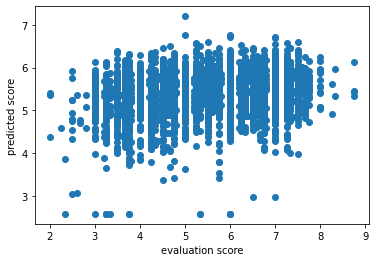

Epoch: 1/50, Train loss: 0.813213, Test loss: 1.642413, Accuracy: 23.80, difference: 1.086050
epoch 2 0.08999381292536139% train finish
epoch 2 9.0893751054615% train finish
epoch 2 18.08875639799764% train finish
epoch 2 27.088137690533777% train finish
epoch 2 36.08751898306991% train finish
epoch 2 45.08690027560605% train finish
epoch 2 54.08628156814219% train finish
epoch 2 63.085662860678326% train finish
epoch 2 72.08504415321445% train finish
epoch 2 81.08442544575061% train finish
epoch 2 90.08380673828674% train finish
epoch 2 99.08318803082288% train finish
epoch 2 train finish
epoch 2 0.35995500562429694% test finish
epoch 2 18.357705286839145% test finish
epoch 2 36.355455568054% test finish
epoch 2 54.35320584926884% test finish
epoch 2 72.3509561304837% test finish
epoch 2 90.34870641169854% test finish


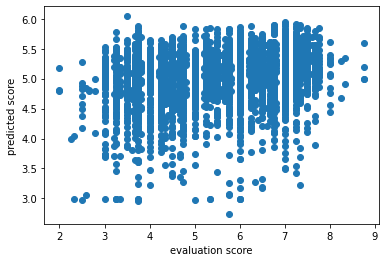

Epoch: 2/50, Train loss: 1.203304, Test loss: 1.851696, Accuracy: 21.57, difference: 1.161861
epoch 3 0.08999381292536139% train finish
epoch 3 9.0893751054615% train finish
epoch 3 18.08875639799764% train finish
epoch 3 27.088137690533777% train finish
epoch 3 36.08751898306991% train finish
epoch 3 45.08690027560605% train finish
epoch 3 54.08628156814219% train finish
epoch 3 63.085662860678326% train finish
epoch 3 72.08504415321445% train finish
epoch 3 81.08442544575061% train finish
epoch 3 90.08380673828674% train finish
epoch 3 99.08318803082288% train finish
epoch 3 train finish
epoch 3 0.35995500562429694% test finish
epoch 3 18.357705286839145% test finish
epoch 3 36.355455568054% test finish
epoch 3 54.35320584926884% test finish
epoch 3 72.3509561304837% test finish
epoch 3 90.34870641169854% test finish


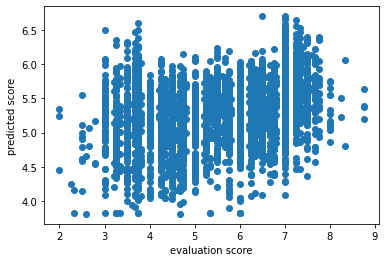

Epoch: 3/50, Train loss: 2.318051, Test loss: 1.582817, Accuracy: 22.54, difference: 1.072747
epoch 4 0.08999381292536139% train finish
epoch 4 9.0893751054615% train finish
epoch 4 18.08875639799764% train finish
epoch 4 27.088137690533777% train finish
epoch 4 36.08751898306991% train finish
epoch 4 45.08690027560605% train finish
epoch 4 54.08628156814219% train finish
epoch 4 63.085662860678326% train finish
epoch 4 72.08504415321445% train finish
epoch 4 81.08442544575061% train finish
epoch 4 90.08380673828674% train finish
epoch 4 99.08318803082288% train finish
epoch 4 train finish
epoch 4 0.35995500562429694% test finish
epoch 4 18.357705286839145% test finish
epoch 4 36.355455568054% test finish
epoch 4 54.35320584926884% test finish
epoch 4 72.3509561304837% test finish
epoch 4 90.34870641169854% test finish


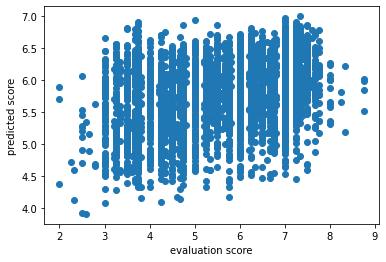

Epoch: 4/50, Train loss: 1.494773, Test loss: 1.561650, Accuracy: 28.05, difference: 1.025047
epoch 5 0.08999381292536139% train finish
epoch 5 9.0893751054615% train finish
epoch 5 18.08875639799764% train finish
epoch 5 27.088137690533777% train finish
epoch 5 36.08751898306991% train finish
epoch 5 45.08690027560605% train finish
epoch 5 54.08628156814219% train finish
epoch 5 63.085662860678326% train finish
epoch 5 72.08504415321445% train finish
epoch 5 81.08442544575061% train finish
epoch 5 90.08380673828674% train finish
epoch 5 99.08318803082288% train finish
epoch 5 train finish
epoch 5 0.35995500562429694% test finish
epoch 5 18.357705286839145% test finish
epoch 5 36.355455568054% test finish
epoch 5 54.35320584926884% test finish
epoch 5 72.3509561304837% test finish
epoch 5 90.34870641169854% test finish


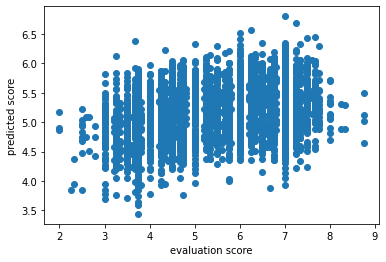

Epoch: 5/50, Train loss: 1.920830, Test loss: 1.694628, Accuracy: 22.25, difference: 1.109461
epoch 6 0.08999381292536139% train finish
epoch 6 9.0893751054615% train finish
epoch 6 18.08875639799764% train finish
epoch 6 27.088137690533777% train finish
epoch 6 36.08751898306991% train finish
epoch 6 45.08690027560605% train finish
epoch 6 54.08628156814219% train finish
epoch 6 63.085662860678326% train finish
epoch 6 72.08504415321445% train finish
epoch 6 81.08442544575061% train finish
epoch 6 90.08380673828674% train finish
epoch 6 99.08318803082288% train finish
epoch 6 train finish
epoch 6 0.35995500562429694% test finish
epoch 6 18.357705286839145% test finish
epoch 6 36.355455568054% test finish
epoch 6 54.35320584926884% test finish
epoch 6 72.3509561304837% test finish
epoch 6 90.34870641169854% test finish


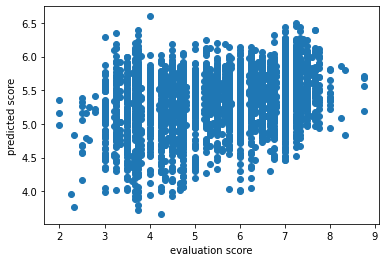

Epoch: 6/50, Train loss: 1.829845, Test loss: 1.523325, Accuracy: 22.32, difference: 1.056909
epoch 7 0.08999381292536139% train finish
epoch 7 9.0893751054615% train finish
epoch 7 18.08875639799764% train finish
epoch 7 27.088137690533777% train finish
epoch 7 36.08751898306991% train finish
epoch 7 45.08690027560605% train finish
epoch 7 54.08628156814219% train finish
epoch 7 63.085662860678326% train finish
epoch 7 72.08504415321445% train finish
epoch 7 81.08442544575061% train finish
epoch 7 90.08380673828674% train finish
epoch 7 99.08318803082288% train finish
epoch 7 train finish
epoch 7 0.35995500562429694% test finish
epoch 7 18.357705286839145% test finish
epoch 7 36.355455568054% test finish
epoch 7 54.35320584926884% test finish
epoch 7 72.3509561304837% test finish
epoch 7 90.34870641169854% test finish


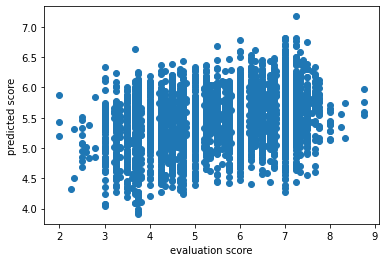

Epoch: 7/50, Train loss: 1.440706, Test loss: 1.521782, Accuracy: 23.73, difference: 1.048367
epoch 8 0.08999381292536139% train finish
epoch 8 9.0893751054615% train finish
epoch 8 18.08875639799764% train finish
epoch 8 27.088137690533777% train finish
epoch 8 36.08751898306991% train finish
epoch 8 45.08690027560605% train finish
epoch 8 54.08628156814219% train finish
epoch 8 63.085662860678326% train finish
epoch 8 72.08504415321445% train finish
epoch 8 81.08442544575061% train finish
epoch 8 90.08380673828674% train finish
epoch 8 99.08318803082288% train finish
epoch 8 train finish
epoch 8 0.35995500562429694% test finish
epoch 8 18.357705286839145% test finish
epoch 8 36.355455568054% test finish
epoch 8 54.35320584926884% test finish
epoch 8 72.3509561304837% test finish
epoch 8 90.34870641169854% test finish


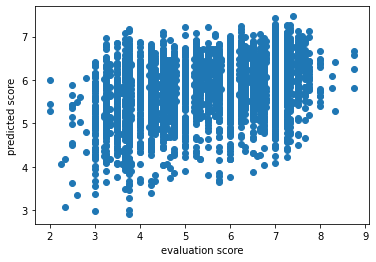

Epoch: 8/50, Train loss: 0.382382, Test loss: 1.576112, Accuracy: 29.45, difference: 1.017120
epoch 9 0.08999381292536139% train finish
epoch 9 9.0893751054615% train finish
epoch 9 18.08875639799764% train finish
epoch 9 27.088137690533777% train finish
epoch 9 36.08751898306991% train finish
epoch 9 45.08690027560605% train finish
epoch 9 54.08628156814219% train finish
epoch 9 63.085662860678326% train finish
epoch 9 72.08504415321445% train finish
epoch 9 81.08442544575061% train finish
epoch 9 90.08380673828674% train finish
epoch 9 99.08318803082288% train finish
epoch 9 train finish
epoch 9 0.35995500562429694% test finish
epoch 9 18.357705286839145% test finish
epoch 9 36.355455568054% test finish
epoch 9 54.35320584926884% test finish
epoch 9 72.3509561304837% test finish
epoch 9 90.34870641169854% test finish


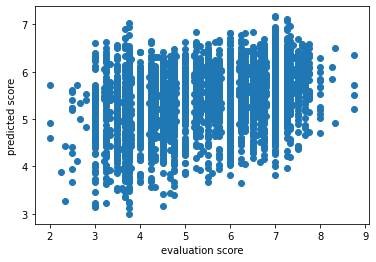

Epoch: 9/50, Train loss: 1.377416, Test loss: 1.546657, Accuracy: 25.11, difference: 1.038209
epoch 10 0.08999381292536139% train finish
epoch 10 9.0893751054615% train finish
epoch 10 18.08875639799764% train finish
epoch 10 27.088137690533777% train finish
epoch 10 36.08751898306991% train finish
epoch 10 45.08690027560605% train finish
epoch 10 54.08628156814219% train finish
epoch 10 63.085662860678326% train finish
epoch 10 72.08504415321445% train finish
epoch 10 81.08442544575061% train finish
epoch 10 90.08380673828674% train finish
epoch 10 99.08318803082288% train finish
epoch 10 train finish
epoch 10 0.35995500562429694% test finish
epoch 10 18.357705286839145% test finish
epoch 10 36.355455568054% test finish
epoch 10 54.35320584926884% test finish
epoch 10 72.3509561304837% test finish
epoch 10 90.34870641169854% test finish


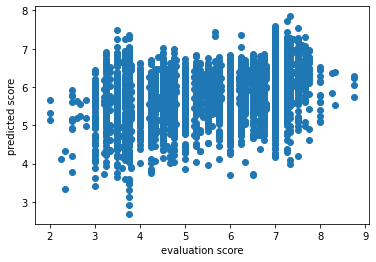

Epoch: 10/50, Train loss: 1.064106, Test loss: 1.551646, Accuracy: 32.04, difference: 0.989398
epoch 11 0.08999381292536139% train finish
epoch 11 9.0893751054615% train finish
epoch 11 18.08875639799764% train finish
epoch 11 27.088137690533777% train finish
epoch 11 36.08751898306991% train finish
epoch 11 45.08690027560605% train finish
epoch 11 54.08628156814219% train finish
epoch 11 63.085662860678326% train finish
epoch 11 72.08504415321445% train finish
epoch 11 81.08442544575061% train finish
epoch 11 90.08380673828674% train finish
epoch 11 99.08318803082288% train finish
epoch 11 train finish
epoch 11 0.35995500562429694% test finish
epoch 11 18.357705286839145% test finish
epoch 11 36.355455568054% test finish
epoch 11 54.35320584926884% test finish
epoch 11 72.3509561304837% test finish
epoch 11 90.34870641169854% test finish


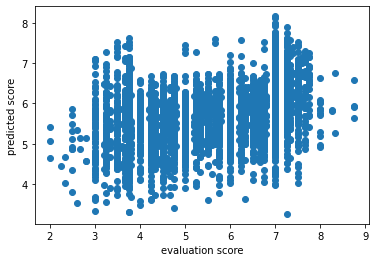

Epoch: 11/50, Train loss: 1.706611, Test loss: 1.524200, Accuracy: 31.07, difference: 0.987119
epoch 12 0.08999381292536139% train finish
epoch 12 9.0893751054615% train finish
epoch 12 18.08875639799764% train finish
epoch 12 27.088137690533777% train finish
epoch 12 36.08751898306991% train finish
epoch 12 45.08690027560605% train finish
epoch 12 54.08628156814219% train finish
epoch 12 63.085662860678326% train finish
epoch 12 72.08504415321445% train finish
epoch 12 81.08442544575061% train finish
epoch 12 90.08380673828674% train finish
epoch 12 99.08318803082288% train finish
epoch 12 train finish
epoch 12 0.35995500562429694% test finish
epoch 12 18.357705286839145% test finish
epoch 12 36.355455568054% test finish
epoch 12 54.35320584926884% test finish
epoch 12 72.3509561304837% test finish
epoch 12 90.34870641169854% test finish


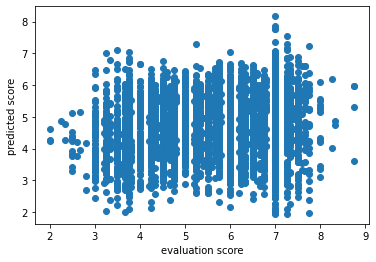

Epoch: 12/50, Train loss: 0.499486, Test loss: 2.884670, Accuracy: 22.97, difference: 1.366968
epoch 13 0.08999381292536139% train finish
epoch 13 9.0893751054615% train finish
epoch 13 18.08875639799764% train finish
epoch 13 27.088137690533777% train finish
epoch 13 36.08751898306991% train finish
epoch 13 45.08690027560605% train finish
epoch 13 54.08628156814219% train finish
epoch 13 63.085662860678326% train finish
epoch 13 72.08504415321445% train finish
epoch 13 81.08442544575061% train finish
epoch 13 90.08380673828674% train finish
epoch 13 99.08318803082288% train finish
epoch 13 train finish
epoch 13 0.35995500562429694% test finish
epoch 13 18.357705286839145% test finish
epoch 13 36.355455568054% test finish
epoch 13 54.35320584926884% test finish
epoch 13 72.3509561304837% test finish
epoch 13 90.34870641169854% test finish


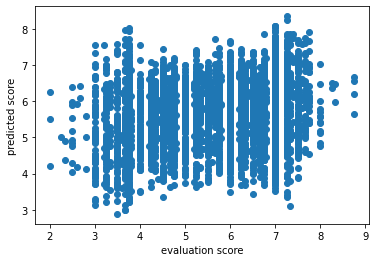

Epoch: 13/50, Train loss: 0.534539, Test loss: 1.943382, Accuracy: 28.14, difference: 1.114535
epoch 14 0.08999381292536139% train finish
epoch 14 9.0893751054615% train finish
epoch 14 18.08875639799764% train finish
epoch 14 27.088137690533777% train finish
epoch 14 36.08751898306991% train finish
epoch 14 45.08690027560605% train finish
epoch 14 54.08628156814219% train finish
epoch 14 63.085662860678326% train finish
epoch 14 72.08504415321445% train finish
epoch 14 81.08442544575061% train finish
epoch 14 90.08380673828674% train finish
epoch 14 99.08318803082288% train finish
epoch 14 train finish
epoch 14 0.35995500562429694% test finish
epoch 14 18.357705286839145% test finish
epoch 14 36.355455568054% test finish
epoch 14 54.35320584926884% test finish
epoch 14 72.3509561304837% test finish
epoch 14 90.34870641169854% test finish


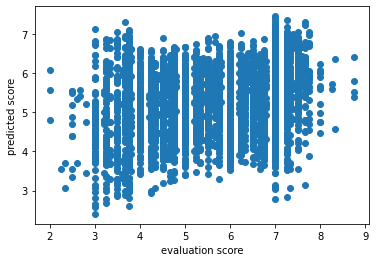

Epoch: 14/50, Train loss: 0.054550, Test loss: 1.838720, Accuracy: 26.12, difference: 1.099757
epoch 15 0.08999381292536139% train finish
epoch 15 9.0893751054615% train finish
epoch 15 18.08875639799764% train finish
epoch 15 27.088137690533777% train finish
epoch 15 36.08751898306991% train finish
epoch 15 45.08690027560605% train finish
epoch 15 54.08628156814219% train finish
epoch 15 63.085662860678326% train finish
epoch 15 72.08504415321445% train finish
epoch 15 81.08442544575061% train finish
epoch 15 90.08380673828674% train finish
epoch 15 99.08318803082288% train finish
epoch 15 train finish
epoch 15 0.35995500562429694% test finish
epoch 15 18.357705286839145% test finish
epoch 15 36.355455568054% test finish
epoch 15 54.35320584926884% test finish
epoch 15 72.3509561304837% test finish
epoch 15 90.34870641169854% test finish


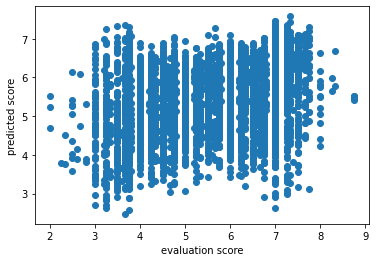

Epoch: 15/50, Train loss: 0.091531, Test loss: 1.804292, Accuracy: 30.51, difference: 1.059653
epoch 16 0.08999381292536139% train finish
epoch 16 9.0893751054615% train finish
epoch 16 18.08875639799764% train finish
epoch 16 27.088137690533777% train finish
epoch 16 36.08751898306991% train finish
epoch 16 45.08690027560605% train finish
epoch 16 54.08628156814219% train finish
epoch 16 63.085662860678326% train finish
epoch 16 72.08504415321445% train finish
epoch 16 81.08442544575061% train finish
epoch 16 90.08380673828674% train finish
epoch 16 99.08318803082288% train finish
epoch 16 train finish
epoch 16 0.35995500562429694% test finish
epoch 16 18.357705286839145% test finish
epoch 16 36.355455568054% test finish
epoch 16 54.35320584926884% test finish
epoch 16 72.3509561304837% test finish
epoch 16 90.34870641169854% test finish


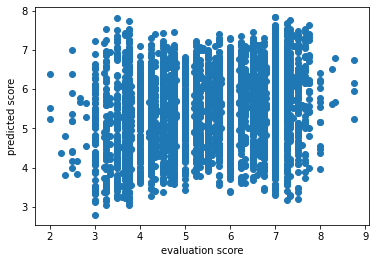

Epoch: 16/50, Train loss: 0.456223, Test loss: 1.964079, Accuracy: 30.15, difference: 1.101538
epoch 17 0.08999381292536139% train finish
epoch 17 9.0893751054615% train finish
epoch 17 18.08875639799764% train finish
epoch 17 27.088137690533777% train finish
epoch 17 36.08751898306991% train finish
epoch 17 45.08690027560605% train finish
epoch 17 54.08628156814219% train finish
epoch 17 63.085662860678326% train finish
epoch 17 72.08504415321445% train finish
epoch 17 81.08442544575061% train finish
epoch 17 90.08380673828674% train finish
epoch 17 99.08318803082288% train finish
epoch 17 train finish
epoch 17 0.35995500562429694% test finish
epoch 17 18.357705286839145% test finish
epoch 17 36.355455568054% test finish
epoch 17 54.35320584926884% test finish
epoch 17 72.3509561304837% test finish
epoch 17 90.34870641169854% test finish


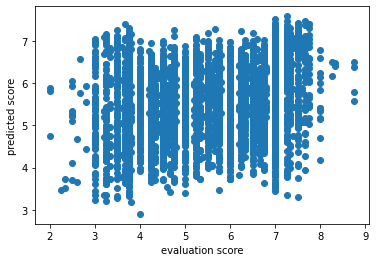

Epoch: 17/50, Train loss: 0.052066, Test loss: 1.797358, Accuracy: 31.59, difference: 1.054219
epoch 18 0.08999381292536139% train finish
epoch 18 9.0893751054615% train finish
epoch 18 18.08875639799764% train finish
epoch 18 27.088137690533777% train finish
epoch 18 36.08751898306991% train finish
epoch 18 45.08690027560605% train finish
epoch 18 54.08628156814219% train finish
epoch 18 63.085662860678326% train finish
epoch 18 72.08504415321445% train finish
epoch 18 81.08442544575061% train finish
epoch 18 90.08380673828674% train finish
epoch 18 99.08318803082288% train finish
epoch 18 train finish
epoch 18 0.35995500562429694% test finish
epoch 18 18.357705286839145% test finish
epoch 18 36.355455568054% test finish
epoch 18 54.35320584926884% test finish
epoch 18 72.3509561304837% test finish
epoch 18 90.34870641169854% test finish


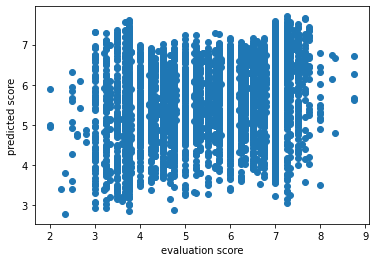

Epoch: 18/50, Train loss: 0.507800, Test loss: 1.906133, Accuracy: 31.99, difference: 1.075314
epoch 19 0.08999381292536139% train finish
epoch 19 9.0893751054615% train finish
epoch 19 18.08875639799764% train finish
epoch 19 27.088137690533777% train finish
epoch 19 36.08751898306991% train finish
epoch 19 45.08690027560605% train finish
epoch 19 54.08628156814219% train finish
epoch 19 63.085662860678326% train finish
epoch 19 72.08504415321445% train finish
epoch 19 81.08442544575061% train finish
epoch 19 90.08380673828674% train finish
epoch 19 99.08318803082288% train finish
epoch 19 train finish
epoch 19 0.35995500562429694% test finish
epoch 19 18.357705286839145% test finish
epoch 19 36.355455568054% test finish
epoch 19 54.35320584926884% test finish
epoch 19 72.3509561304837% test finish
epoch 19 90.34870641169854% test finish


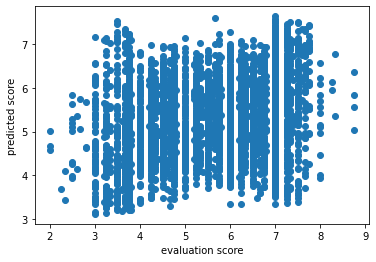

Epoch: 19/50, Train loss: 0.064309, Test loss: 1.874844, Accuracy: 30.80, difference: 1.082509
epoch 20 0.08999381292536139% train finish
epoch 20 9.0893751054615% train finish
epoch 20 18.08875639799764% train finish
epoch 20 27.088137690533777% train finish
epoch 20 36.08751898306991% train finish
epoch 20 45.08690027560605% train finish
epoch 20 54.08628156814219% train finish
epoch 20 63.085662860678326% train finish
epoch 20 72.08504415321445% train finish
epoch 20 81.08442544575061% train finish
epoch 20 90.08380673828674% train finish
epoch 20 99.08318803082288% train finish
epoch 20 train finish
epoch 20 0.35995500562429694% test finish
epoch 20 18.357705286839145% test finish
epoch 20 36.355455568054% test finish
epoch 20 54.35320584926884% test finish
epoch 20 72.3509561304837% test finish
epoch 20 90.34870641169854% test finish


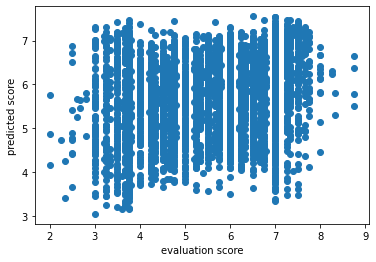

Epoch: 20/50, Train loss: 0.029753, Test loss: 1.889856, Accuracy: 32.96, difference: 1.068013
epoch 21 0.08999381292536139% train finish
epoch 21 9.0893751054615% train finish
epoch 21 18.08875639799764% train finish
epoch 21 27.088137690533777% train finish
epoch 21 36.08751898306991% train finish
epoch 21 45.08690027560605% train finish
epoch 21 54.08628156814219% train finish
epoch 21 63.085662860678326% train finish
epoch 21 72.08504415321445% train finish
epoch 21 81.08442544575061% train finish
epoch 21 90.08380673828674% train finish
epoch 21 99.08318803082288% train finish
epoch 21 train finish
epoch 21 0.35995500562429694% test finish
epoch 21 18.357705286839145% test finish
epoch 21 36.355455568054% test finish
epoch 21 54.35320584926884% test finish
epoch 21 72.3509561304837% test finish
epoch 21 90.34870641169854% test finish


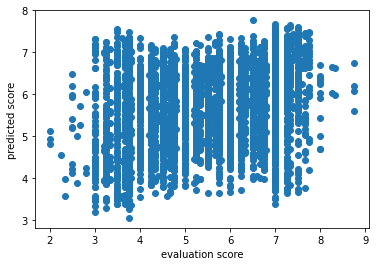

Epoch: 21/50, Train loss: 0.456388, Test loss: 1.827071, Accuracy: 33.97, difference: 1.039839
epoch 22 0.08999381292536139% train finish
epoch 22 9.0893751054615% train finish
epoch 22 18.08875639799764% train finish
epoch 22 27.088137690533777% train finish
epoch 22 36.08751898306991% train finish
epoch 22 45.08690027560605% train finish
epoch 22 54.08628156814219% train finish
epoch 22 63.085662860678326% train finish
epoch 22 72.08504415321445% train finish
epoch 22 81.08442544575061% train finish
epoch 22 90.08380673828674% train finish
epoch 22 99.08318803082288% train finish
epoch 22 train finish
epoch 22 0.35995500562429694% test finish
epoch 22 18.357705286839145% test finish
epoch 22 36.355455568054% test finish
epoch 22 54.35320584926884% test finish
epoch 22 72.3509561304837% test finish
epoch 22 90.34870641169854% test finish


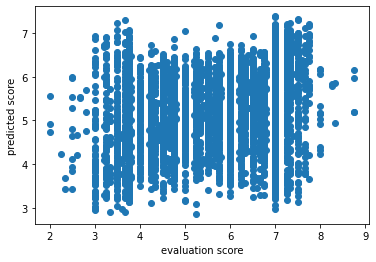

Epoch: 22/50, Train loss: 0.568594, Test loss: 2.000533, Accuracy: 28.75, difference: 1.117471
epoch 23 0.08999381292536139% train finish
epoch 23 9.0893751054615% train finish
epoch 23 18.08875639799764% train finish
epoch 23 27.088137690533777% train finish
epoch 23 36.08751898306991% train finish
epoch 23 45.08690027560605% train finish
epoch 23 54.08628156814219% train finish
epoch 23 63.085662860678326% train finish
epoch 23 72.08504415321445% train finish
epoch 23 81.08442544575061% train finish
epoch 23 90.08380673828674% train finish
epoch 23 99.08318803082288% train finish
epoch 23 train finish
epoch 23 0.35995500562429694% test finish
epoch 23 18.357705286839145% test finish
epoch 23 36.355455568054% test finish
epoch 23 54.35320584926884% test finish
epoch 23 72.3509561304837% test finish
epoch 23 90.34870641169854% test finish


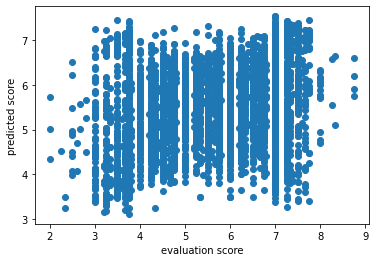

Epoch: 23/50, Train loss: 0.519584, Test loss: 1.800453, Accuracy: 33.52, difference: 1.037960
epoch 24 0.08999381292536139% train finish
epoch 24 9.0893751054615% train finish
epoch 24 18.08875639799764% train finish
epoch 24 27.088137690533777% train finish
epoch 24 36.08751898306991% train finish
epoch 24 45.08690027560605% train finish
epoch 24 54.08628156814219% train finish
epoch 24 63.085662860678326% train finish
epoch 24 72.08504415321445% train finish
epoch 24 81.08442544575061% train finish
epoch 24 90.08380673828674% train finish
epoch 24 99.08318803082288% train finish
epoch 24 train finish
epoch 24 0.35995500562429694% test finish
epoch 24 18.357705286839145% test finish
epoch 24 36.355455568054% test finish
epoch 24 54.35320584926884% test finish
epoch 24 72.3509561304837% test finish
epoch 24 90.34870641169854% test finish


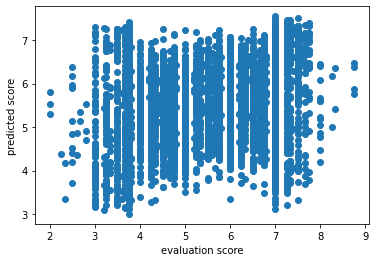

Epoch: 24/50, Train loss: 0.280230, Test loss: 1.830190, Accuracy: 33.66, difference: 1.040565
epoch 25 0.08999381292536139% train finish
epoch 25 9.0893751054615% train finish
epoch 25 18.08875639799764% train finish
epoch 25 27.088137690533777% train finish
epoch 25 36.08751898306991% train finish
epoch 25 45.08690027560605% train finish
epoch 25 54.08628156814219% train finish
epoch 25 63.085662860678326% train finish
epoch 25 72.08504415321445% train finish
epoch 25 81.08442544575061% train finish
epoch 25 90.08380673828674% train finish
epoch 25 99.08318803082288% train finish
epoch 25 train finish
epoch 25 0.35995500562429694% test finish
epoch 25 18.357705286839145% test finish
epoch 25 36.355455568054% test finish
epoch 25 54.35320584926884% test finish
epoch 25 72.3509561304837% test finish
epoch 25 90.34870641169854% test finish


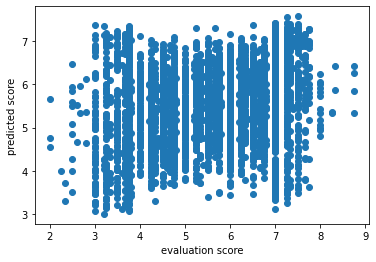

Epoch: 25/50, Train loss: 0.257320, Test loss: 1.868753, Accuracy: 33.57, difference: 1.048637
epoch 26 0.08999381292536139% train finish
epoch 26 9.0893751054615% train finish
epoch 26 18.08875639799764% train finish
epoch 26 27.088137690533777% train finish
epoch 26 36.08751898306991% train finish
epoch 26 45.08690027560605% train finish
epoch 26 54.08628156814219% train finish
epoch 26 63.085662860678326% train finish
epoch 26 72.08504415321445% train finish
epoch 26 81.08442544575061% train finish
epoch 26 90.08380673828674% train finish
epoch 26 99.08318803082288% train finish
epoch 26 train finish
epoch 26 0.35995500562429694% test finish
epoch 26 18.357705286839145% test finish
epoch 26 36.355455568054% test finish
epoch 26 54.35320584926884% test finish
epoch 26 72.3509561304837% test finish
epoch 26 90.34870641169854% test finish


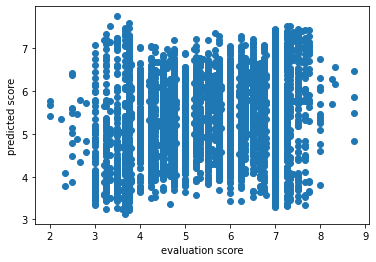

Epoch: 26/50, Train loss: 1.665554, Test loss: 1.964633, Accuracy: 32.89, difference: 1.078039
epoch 27 0.08999381292536139% train finish
epoch 27 9.0893751054615% train finish
epoch 27 18.08875639799764% train finish
epoch 27 27.088137690533777% train finish
epoch 27 36.08751898306991% train finish
epoch 27 45.08690027560605% train finish
epoch 27 54.08628156814219% train finish
epoch 27 63.085662860678326% train finish
epoch 27 72.08504415321445% train finish
epoch 27 81.08442544575061% train finish
epoch 27 90.08380673828674% train finish
epoch 27 99.08318803082288% train finish
epoch 27 train finish
epoch 27 0.35995500562429694% test finish
epoch 27 18.357705286839145% test finish
epoch 27 36.355455568054% test finish
epoch 27 54.35320584926884% test finish
epoch 27 72.3509561304837% test finish
epoch 27 90.34870641169854% test finish


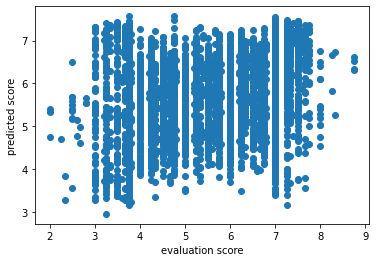

Epoch: 27/50, Train loss: 0.290328, Test loss: 1.902303, Accuracy: 33.99, difference: 1.052995
epoch 28 0.08999381292536139% train finish
epoch 28 9.0893751054615% train finish
epoch 28 18.08875639799764% train finish
epoch 28 27.088137690533777% train finish
epoch 28 36.08751898306991% train finish
epoch 28 45.08690027560605% train finish
epoch 28 54.08628156814219% train finish
epoch 28 63.085662860678326% train finish
epoch 28 72.08504415321445% train finish
epoch 28 81.08442544575061% train finish
epoch 28 90.08380673828674% train finish
epoch 28 99.08318803082288% train finish
epoch 28 train finish
epoch 28 0.35995500562429694% test finish
epoch 28 18.357705286839145% test finish
epoch 28 36.355455568054% test finish
epoch 28 54.35320584926884% test finish
epoch 28 72.3509561304837% test finish
epoch 28 90.34870641169854% test finish


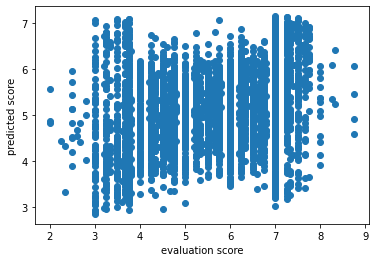

Epoch: 28/50, Train loss: 0.272369, Test loss: 1.918030, Accuracy: 28.28, difference: 1.103228
epoch 29 0.08999381292536139% train finish
epoch 29 9.0893751054615% train finish
epoch 29 18.08875639799764% train finish
epoch 29 27.088137690533777% train finish
epoch 29 36.08751898306991% train finish
epoch 29 45.08690027560605% train finish
epoch 29 54.08628156814219% train finish
epoch 29 63.085662860678326% train finish
epoch 29 72.08504415321445% train finish
epoch 29 81.08442544575061% train finish
epoch 29 90.08380673828674% train finish
epoch 29 99.08318803082288% train finish
epoch 29 train finish
epoch 29 0.35995500562429694% test finish
epoch 29 18.357705286839145% test finish
epoch 29 36.355455568054% test finish
epoch 29 54.35320584926884% test finish
epoch 29 72.3509561304837% test finish
epoch 29 90.34870641169854% test finish


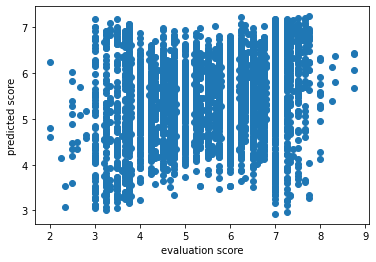

Epoch: 29/50, Train loss: 0.017743, Test loss: 1.770805, Accuracy: 32.62, difference: 1.030707
epoch 30 0.08999381292536139% train finish
epoch 30 9.0893751054615% train finish
epoch 30 18.08875639799764% train finish
epoch 30 27.088137690533777% train finish
epoch 30 36.08751898306991% train finish
epoch 30 45.08690027560605% train finish
epoch 30 54.08628156814219% train finish
epoch 30 63.085662860678326% train finish
epoch 30 72.08504415321445% train finish
epoch 30 81.08442544575061% train finish
epoch 30 90.08380673828674% train finish
epoch 30 99.08318803082288% train finish
epoch 30 train finish
epoch 30 0.35995500562429694% test finish
epoch 30 18.357705286839145% test finish
epoch 30 36.355455568054% test finish
epoch 30 54.35320584926884% test finish
epoch 30 72.3509561304837% test finish
epoch 30 90.34870641169854% test finish


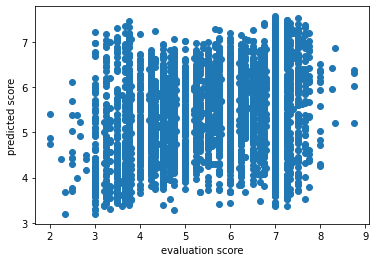

Epoch: 30/50, Train loss: 0.099722, Test loss: 1.789371, Accuracy: 33.00, difference: 1.034285
epoch 31 0.08999381292536139% train finish
epoch 31 9.0893751054615% train finish
epoch 31 18.08875639799764% train finish
epoch 31 27.088137690533777% train finish
epoch 31 36.08751898306991% train finish
epoch 31 45.08690027560605% train finish
epoch 31 54.08628156814219% train finish
epoch 31 63.085662860678326% train finish
epoch 31 72.08504415321445% train finish
epoch 31 81.08442544575061% train finish
epoch 31 90.08380673828674% train finish
epoch 31 99.08318803082288% train finish
epoch 31 train finish
epoch 31 0.35995500562429694% test finish
epoch 31 18.357705286839145% test finish
epoch 31 36.355455568054% test finish
epoch 31 54.35320584926884% test finish
epoch 31 72.3509561304837% test finish
epoch 31 90.34870641169854% test finish


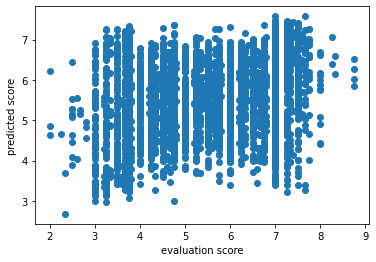

Epoch: 31/50, Train loss: 0.279363, Test loss: 1.762443, Accuracy: 33.68, difference: 1.024395
epoch 32 0.08999381292536139% train finish
epoch 32 9.0893751054615% train finish
epoch 32 18.08875639799764% train finish
epoch 32 27.088137690533777% train finish
epoch 32 36.08751898306991% train finish
epoch 32 45.08690027560605% train finish
epoch 32 54.08628156814219% train finish
epoch 32 63.085662860678326% train finish
epoch 32 72.08504415321445% train finish
epoch 32 81.08442544575061% train finish
epoch 32 90.08380673828674% train finish
epoch 32 99.08318803082288% train finish
epoch 32 train finish
epoch 32 0.35995500562429694% test finish
epoch 32 18.357705286839145% test finish
epoch 32 36.355455568054% test finish
epoch 32 54.35320584926884% test finish
epoch 32 72.3509561304837% test finish
epoch 32 90.34870641169854% test finish


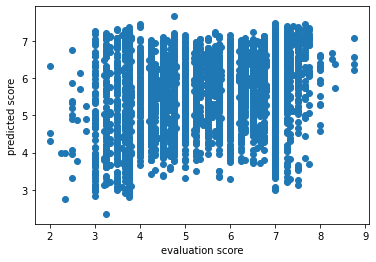

Epoch: 32/50, Train loss: 0.048700, Test loss: 1.834347, Accuracy: 34.60, difference: 1.032864
epoch 33 0.08999381292536139% train finish
epoch 33 9.0893751054615% train finish
epoch 33 18.08875639799764% train finish
epoch 33 27.088137690533777% train finish
epoch 33 36.08751898306991% train finish
epoch 33 45.08690027560605% train finish
epoch 33 54.08628156814219% train finish
epoch 33 63.085662860678326% train finish
epoch 33 72.08504415321445% train finish
epoch 33 81.08442544575061% train finish
epoch 33 90.08380673828674% train finish
epoch 33 99.08318803082288% train finish
epoch 33 train finish
epoch 33 0.35995500562429694% test finish
epoch 33 18.357705286839145% test finish
epoch 33 36.355455568054% test finish
epoch 33 54.35320584926884% test finish
epoch 33 72.3509561304837% test finish
epoch 33 90.34870641169854% test finish


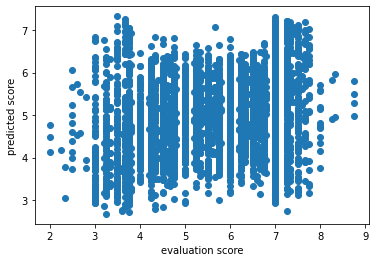

Epoch: 33/50, Train loss: 0.105792, Test loss: 2.322686, Accuracy: 27.92, difference: 1.199073
epoch 34 0.08999381292536139% train finish
epoch 34 9.0893751054615% train finish
epoch 34 18.08875639799764% train finish
epoch 34 27.088137690533777% train finish
epoch 34 36.08751898306991% train finish
epoch 34 45.08690027560605% train finish
epoch 34 54.08628156814219% train finish
epoch 34 63.085662860678326% train finish
epoch 34 72.08504415321445% train finish
epoch 34 81.08442544575061% train finish
epoch 34 90.08380673828674% train finish
epoch 34 99.08318803082288% train finish
epoch 34 train finish
epoch 34 0.35995500562429694% test finish
epoch 34 18.357705286839145% test finish
epoch 34 36.355455568054% test finish
epoch 34 54.35320584926884% test finish
epoch 34 72.3509561304837% test finish
epoch 34 90.34870641169854% test finish


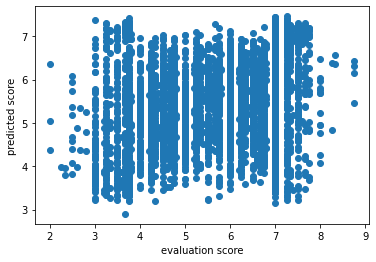

Epoch: 34/50, Train loss: 0.366434, Test loss: 1.929555, Accuracy: 34.51, difference: 1.062780
epoch 35 0.08999381292536139% train finish
epoch 35 9.0893751054615% train finish
epoch 35 18.08875639799764% train finish
epoch 35 27.088137690533777% train finish
epoch 35 36.08751898306991% train finish
epoch 35 45.08690027560605% train finish
epoch 35 54.08628156814219% train finish
epoch 35 63.085662860678326% train finish
epoch 35 72.08504415321445% train finish
epoch 35 81.08442544575061% train finish
epoch 35 90.08380673828674% train finish
epoch 35 99.08318803082288% train finish
epoch 35 train finish
epoch 35 0.35995500562429694% test finish
epoch 35 18.357705286839145% test finish
epoch 35 36.355455568054% test finish
epoch 35 54.35320584926884% test finish
epoch 35 72.3509561304837% test finish
epoch 35 90.34870641169854% test finish


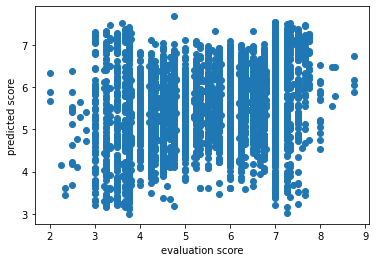

Epoch: 35/50, Train loss: 0.220248, Test loss: 1.798616, Accuracy: 36.06, difference: 1.011986
epoch 36 0.08999381292536139% train finish
epoch 36 9.0893751054615% train finish
epoch 36 18.08875639799764% train finish
epoch 36 27.088137690533777% train finish
epoch 36 36.08751898306991% train finish
epoch 36 45.08690027560605% train finish
epoch 36 54.08628156814219% train finish
epoch 36 63.085662860678326% train finish
epoch 36 72.08504415321445% train finish
epoch 36 81.08442544575061% train finish
epoch 36 90.08380673828674% train finish
epoch 36 99.08318803082288% train finish
epoch 36 train finish
epoch 36 0.35995500562429694% test finish
epoch 36 18.357705286839145% test finish
epoch 36 36.355455568054% test finish
epoch 36 54.35320584926884% test finish
epoch 36 72.3509561304837% test finish
epoch 36 90.34870641169854% test finish


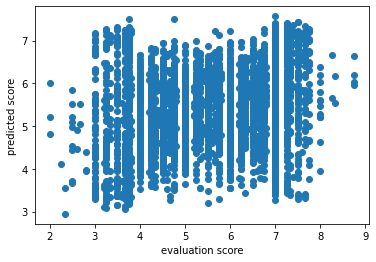

Epoch: 36/50, Train loss: 0.096969, Test loss: 1.836277, Accuracy: 35.28, difference: 1.025043
epoch 37 0.08999381292536139% train finish
epoch 37 9.0893751054615% train finish
epoch 37 18.08875639799764% train finish
epoch 37 27.088137690533777% train finish
epoch 37 36.08751898306991% train finish
epoch 37 45.08690027560605% train finish
epoch 37 54.08628156814219% train finish
epoch 37 63.085662860678326% train finish
epoch 37 72.08504415321445% train finish
epoch 37 81.08442544575061% train finish
epoch 37 90.08380673828674% train finish
epoch 37 99.08318803082288% train finish
epoch 37 train finish
epoch 37 0.35995500562429694% test finish
epoch 37 18.357705286839145% test finish
epoch 37 36.355455568054% test finish
epoch 37 54.35320584926884% test finish
epoch 37 72.3509561304837% test finish
epoch 37 90.34870641169854% test finish


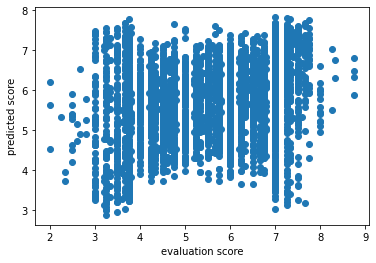

Epoch: 37/50, Train loss: 0.030984, Test loss: 1.971914, Accuracy: 35.34, difference: 1.060114
epoch 38 0.08999381292536139% train finish
epoch 38 9.0893751054615% train finish
epoch 38 18.08875639799764% train finish
epoch 38 27.088137690533777% train finish
epoch 38 36.08751898306991% train finish
epoch 38 45.08690027560605% train finish
epoch 38 54.08628156814219% train finish
epoch 38 63.085662860678326% train finish
epoch 38 72.08504415321445% train finish
epoch 38 81.08442544575061% train finish
epoch 38 90.08380673828674% train finish
epoch 38 99.08318803082288% train finish
epoch 38 train finish
epoch 38 0.35995500562429694% test finish
epoch 38 18.357705286839145% test finish
epoch 38 36.355455568054% test finish
epoch 38 54.35320584926884% test finish
epoch 38 72.3509561304837% test finish
epoch 38 90.34870641169854% test finish


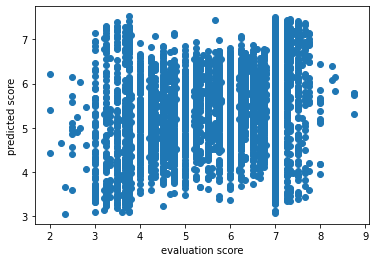

Epoch: 38/50, Train loss: 0.988740, Test loss: 1.862147, Accuracy: 33.88, difference: 1.043681
epoch 39 0.08999381292536139% train finish
epoch 39 9.0893751054615% train finish
epoch 39 18.08875639799764% train finish
epoch 39 27.088137690533777% train finish
epoch 39 36.08751898306991% train finish
epoch 39 45.08690027560605% train finish
epoch 39 54.08628156814219% train finish
epoch 39 63.085662860678326% train finish
epoch 39 72.08504415321445% train finish
epoch 39 81.08442544575061% train finish
epoch 39 90.08380673828674% train finish
epoch 39 99.08318803082288% train finish
epoch 39 train finish
epoch 39 0.35995500562429694% test finish
epoch 39 18.357705286839145% test finish
epoch 39 36.355455568054% test finish
epoch 39 54.35320584926884% test finish
epoch 39 72.3509561304837% test finish
epoch 39 90.34870641169854% test finish


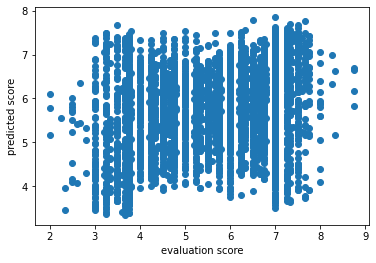

Epoch: 39/50, Train loss: 0.104113, Test loss: 1.932248, Accuracy: 32.58, difference: 1.071740
epoch 40 0.08999381292536139% train finish
epoch 40 9.0893751054615% train finish
epoch 40 18.08875639799764% train finish
epoch 40 27.088137690533777% train finish
epoch 40 36.08751898306991% train finish
epoch 40 45.08690027560605% train finish
epoch 40 54.08628156814219% train finish
epoch 40 63.085662860678326% train finish
epoch 40 72.08504415321445% train finish
epoch 40 81.08442544575061% train finish
epoch 40 90.08380673828674% train finish
epoch 40 99.08318803082288% train finish
epoch 40 train finish
epoch 40 0.35995500562429694% test finish
epoch 40 18.357705286839145% test finish
epoch 40 36.355455568054% test finish
epoch 40 54.35320584926884% test finish
epoch 40 72.3509561304837% test finish
epoch 40 90.34870641169854% test finish


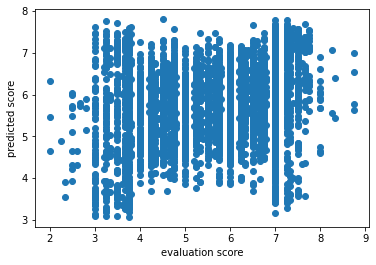

Epoch: 40/50, Train loss: 0.373077, Test loss: 1.940446, Accuracy: 34.49, difference: 1.054596
epoch 41 0.08999381292536139% train finish
epoch 41 9.0893751054615% train finish
epoch 41 18.08875639799764% train finish
epoch 41 27.088137690533777% train finish
epoch 41 36.08751898306991% train finish
epoch 41 45.08690027560605% train finish
epoch 41 54.08628156814219% train finish
epoch 41 63.085662860678326% train finish
epoch 41 72.08504415321445% train finish
epoch 41 81.08442544575061% train finish
epoch 41 90.08380673828674% train finish
epoch 41 99.08318803082288% train finish
epoch 41 train finish
epoch 41 0.35995500562429694% test finish
epoch 41 18.357705286839145% test finish
epoch 41 36.355455568054% test finish
epoch 41 54.35320584926884% test finish
epoch 41 72.3509561304837% test finish
epoch 41 90.34870641169854% test finish


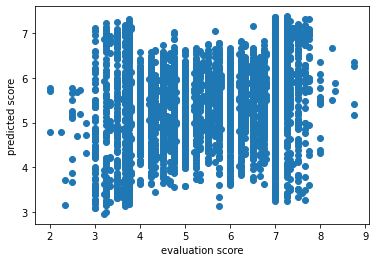

Epoch: 41/50, Train loss: 0.269687, Test loss: 1.840139, Accuracy: 33.75, difference: 1.039157
epoch 42 0.08999381292536139% train finish
epoch 42 9.0893751054615% train finish
epoch 42 18.08875639799764% train finish
epoch 42 27.088137690533777% train finish
epoch 42 36.08751898306991% train finish
epoch 42 45.08690027560605% train finish
epoch 42 54.08628156814219% train finish
epoch 42 63.085662860678326% train finish
epoch 42 72.08504415321445% train finish
epoch 42 81.08442544575061% train finish
epoch 42 90.08380673828674% train finish
epoch 42 99.08318803082288% train finish
epoch 42 train finish
epoch 42 0.35995500562429694% test finish
epoch 42 18.357705286839145% test finish
epoch 42 36.355455568054% test finish
epoch 42 54.35320584926884% test finish
epoch 42 72.3509561304837% test finish
epoch 42 90.34870641169854% test finish


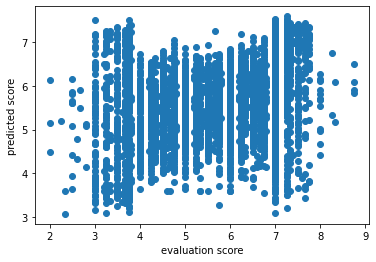

Epoch: 42/50, Train loss: 0.044713, Test loss: 1.776170, Accuracy: 34.56, difference: 1.013831
epoch 43 0.08999381292536139% train finish
epoch 43 9.0893751054615% train finish
epoch 43 18.08875639799764% train finish
epoch 43 27.088137690533777% train finish
epoch 43 36.08751898306991% train finish
epoch 43 45.08690027560605% train finish
epoch 43 54.08628156814219% train finish
epoch 43 63.085662860678326% train finish
epoch 43 72.08504415321445% train finish
epoch 43 81.08442544575061% train finish
epoch 43 90.08380673828674% train finish
epoch 43 99.08318803082288% train finish
epoch 43 train finish
epoch 43 0.35995500562429694% test finish
epoch 43 18.357705286839145% test finish
epoch 43 36.355455568054% test finish
epoch 43 54.35320584926884% test finish
epoch 43 72.3509561304837% test finish
epoch 43 90.34870641169854% test finish


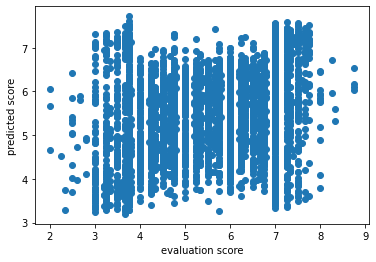

Epoch: 43/50, Train loss: 0.152643, Test loss: 1.845234, Accuracy: 36.20, difference: 1.022768
epoch 44 0.08999381292536139% train finish
epoch 44 9.0893751054615% train finish
epoch 44 18.08875639799764% train finish
epoch 44 27.088137690533777% train finish
epoch 44 36.08751898306991% train finish
epoch 44 45.08690027560605% train finish
epoch 44 54.08628156814219% train finish
epoch 44 63.085662860678326% train finish
epoch 44 72.08504415321445% train finish
epoch 44 81.08442544575061% train finish
epoch 44 90.08380673828674% train finish
epoch 44 99.08318803082288% train finish
epoch 44 train finish
epoch 44 0.35995500562429694% test finish
epoch 44 18.357705286839145% test finish
epoch 44 36.355455568054% test finish
epoch 44 54.35320584926884% test finish
epoch 44 72.3509561304837% test finish
epoch 44 90.34870641169854% test finish


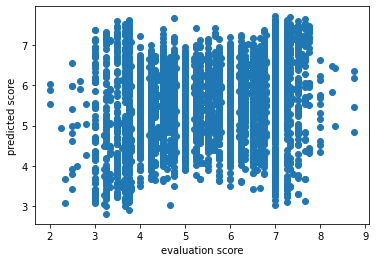

Epoch: 44/50, Train loss: 0.943942, Test loss: 1.959396, Accuracy: 35.55, difference: 1.056555
epoch 45 0.08999381292536139% train finish
epoch 45 9.0893751054615% train finish
epoch 45 18.08875639799764% train finish
epoch 45 27.088137690533777% train finish
epoch 45 36.08751898306991% train finish
epoch 45 45.08690027560605% train finish
epoch 45 54.08628156814219% train finish
epoch 45 63.085662860678326% train finish
epoch 45 72.08504415321445% train finish
epoch 45 81.08442544575061% train finish
epoch 45 90.08380673828674% train finish
epoch 45 99.08318803082288% train finish
epoch 45 train finish
epoch 45 0.35995500562429694% test finish
epoch 45 18.357705286839145% test finish
epoch 45 36.355455568054% test finish
epoch 45 54.35320584926884% test finish
epoch 45 72.3509561304837% test finish
epoch 45 90.34870641169854% test finish


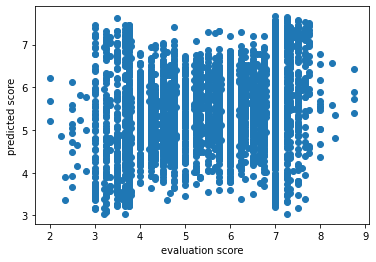

Epoch: 45/50, Train loss: 0.023319, Test loss: 1.887887, Accuracy: 34.35, difference: 1.044530
epoch 46 0.08999381292536139% train finish
epoch 46 9.0893751054615% train finish
epoch 46 18.08875639799764% train finish
epoch 46 27.088137690533777% train finish
epoch 46 36.08751898306991% train finish
epoch 46 45.08690027560605% train finish
epoch 46 54.08628156814219% train finish
epoch 46 63.085662860678326% train finish
epoch 46 72.08504415321445% train finish
epoch 46 81.08442544575061% train finish
epoch 46 90.08380673828674% train finish
epoch 46 99.08318803082288% train finish
epoch 46 train finish
epoch 46 0.35995500562429694% test finish
epoch 46 18.357705286839145% test finish
epoch 46 36.355455568054% test finish
epoch 46 54.35320584926884% test finish
epoch 46 72.3509561304837% test finish
epoch 46 90.34870641169854% test finish


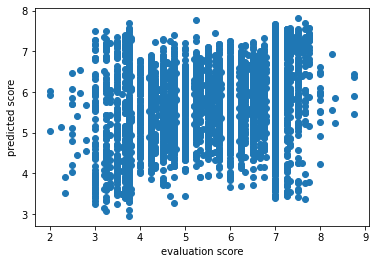

Epoch: 46/50, Train loss: 0.235076, Test loss: 1.882069, Accuracy: 35.07, difference: 1.039692
epoch 47 0.08999381292536139% train finish
epoch 47 9.0893751054615% train finish
epoch 47 18.08875639799764% train finish
epoch 47 27.088137690533777% train finish
epoch 47 36.08751898306991% train finish
epoch 47 45.08690027560605% train finish
epoch 47 54.08628156814219% train finish
epoch 47 63.085662860678326% train finish
epoch 47 72.08504415321445% train finish
epoch 47 81.08442544575061% train finish
epoch 47 90.08380673828674% train finish
epoch 47 99.08318803082288% train finish
epoch 47 train finish
epoch 47 0.35995500562429694% test finish
epoch 47 18.357705286839145% test finish
epoch 47 36.355455568054% test finish
epoch 47 54.35320584926884% test finish
epoch 47 72.3509561304837% test finish
epoch 47 90.34870641169854% test finish


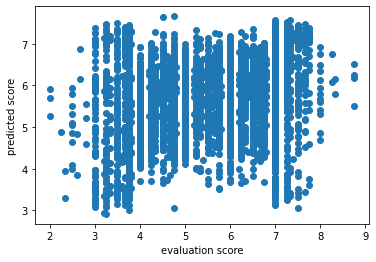

Epoch: 47/50, Train loss: 0.582524, Test loss: 1.842224, Accuracy: 37.21, difference: 1.014025
epoch 48 0.08999381292536139% train finish
epoch 48 9.0893751054615% train finish
epoch 48 18.08875639799764% train finish
epoch 48 27.088137690533777% train finish
epoch 48 36.08751898306991% train finish
epoch 48 45.08690027560605% train finish
epoch 48 54.08628156814219% train finish
epoch 48 63.085662860678326% train finish
epoch 48 72.08504415321445% train finish
epoch 48 81.08442544575061% train finish
epoch 48 90.08380673828674% train finish
epoch 48 99.08318803082288% train finish
epoch 48 train finish
epoch 48 0.35995500562429694% test finish
epoch 48 18.357705286839145% test finish
epoch 48 36.355455568054% test finish
epoch 48 54.35320584926884% test finish
epoch 48 72.3509561304837% test finish
epoch 48 90.34870641169854% test finish


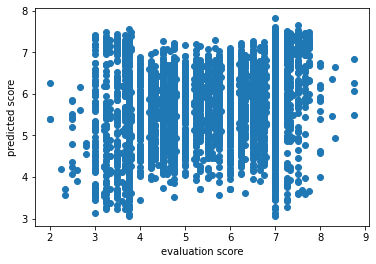

Epoch: 48/50, Train loss: 0.342960, Test loss: 1.829471, Accuracy: 37.30, difference: 1.008955
epoch 49 0.08999381292536139% train finish
epoch 49 9.0893751054615% train finish
epoch 49 18.08875639799764% train finish
epoch 49 27.088137690533777% train finish
epoch 49 36.08751898306991% train finish
epoch 49 45.08690027560605% train finish
epoch 49 54.08628156814219% train finish
epoch 49 63.085662860678326% train finish
epoch 49 72.08504415321445% train finish
epoch 49 81.08442544575061% train finish
epoch 49 90.08380673828674% train finish
epoch 49 99.08318803082288% train finish
epoch 49 train finish
epoch 49 0.35995500562429694% test finish
epoch 49 18.357705286839145% test finish
epoch 49 36.355455568054% test finish
epoch 49 54.35320584926884% test finish
epoch 49 72.3509561304837% test finish
epoch 49 90.34870641169854% test finish


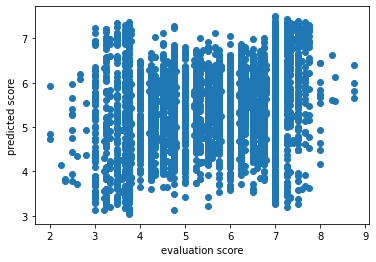

Epoch: 49/50, Train loss: 0.115157, Test loss: 1.794366, Accuracy: 35.39, difference: 1.016869
epoch 50 0.08999381292536139% train finish
epoch 50 9.0893751054615% train finish
epoch 50 18.08875639799764% train finish
epoch 50 27.088137690533777% train finish
epoch 50 36.08751898306991% train finish
epoch 50 45.08690027560605% train finish
epoch 50 54.08628156814219% train finish
epoch 50 63.085662860678326% train finish
epoch 50 72.08504415321445% train finish
epoch 50 81.08442544575061% train finish
epoch 50 90.08380673828674% train finish
epoch 50 99.08318803082288% train finish
epoch 50 train finish
epoch 50 0.35995500562429694% test finish
epoch 50 18.357705286839145% test finish
epoch 50 36.355455568054% test finish
epoch 50 54.35320584926884% test finish
epoch 50 72.3509561304837% test finish
epoch 50 90.34870641169854% test finish


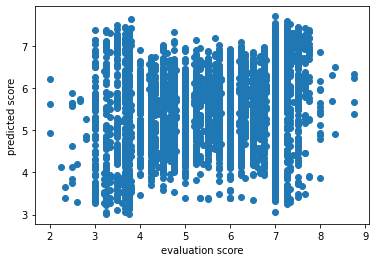

Epoch: 50/50, Train loss: 0.055393, Test loss: 1.865873, Accuracy: 34.42, difference: 1.035835
min loss: 1.5217815918917061
average_loss: 1.8373182667117016
average_accuracy: 31.270641169853764


In [16]:
import gc
gc.collect()              
torch.cuda.empty_cache()
train(model, params)

In [17]:

from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [18]:
+=1

SyntaxError: invalid syntax (1170883156.py, line 1)

## 테스트

In [ ]:
#@title
import cv2
class TestDataSet(Dataset):
    def __init__(self, overall_image_path, transform=None):
        print("initialize data sets")
        self.transform = transform
        rating_dict = {}
        self.image_list = list()
        self.score_list = list()
        cnt = 0
        year_image_path = overall_image_path
        # year_image_path = overall_image_path+"iclr"+year+"/"
        with jsonlines.open(f"drive/Shareddrives/소종-논문/iclr2021_metadata.jsonl") as read_file:
            for line in read_file.iter():
                rating_dict[line['forum']] = line['rating']
        input_paths = os.listdir(year_image_path)
        input_paths.sort()
        for one_file_image_path in tqdm(input_paths, desc="make data set"):
            image_path = year_image_path + one_file_image_path + "/"
            before_add_size = len(self.image_list)
            imgs = glob.glob(image_path + "1.bin")
            imgs.sort()
            self.image_list.extend(imgs) # glob: 폴더 내의 파일 찾아줌
            rating = rating_dict[one_file_image_path]
            self.score_list.extend([rating] * (len(self.image_list)-before_add_size))
            cnt += len(self.image_list)-before_add_size

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = self.image_list[idx]
        label = self.score_list[idx]
        binary_file = image_path   # binary_file = dataset/image/iclr2021/_0kaDkv3dVf/3.bin 
        with open(binary_file, 'rb') as f:
            data = f.read()
        encoded_img = np.fromstring(data, dtype=np.uint8)
        img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR) 
        if self.transform is not None:
            img = self.transform(img)

        return img, label

    def img_list(self):
      print(self.image_list)

In [ ]:
image_path = "drive/Shareddrives/소종-논문/test/binary/occlusion/" 
dataset_file_name = 'iclr2021_dataset_test.pt'

In [ ]:
def test_make_save_data_set(image_path, dataset_file_name):
  print("start to make data set")
  transform = transforms.Compose([
      transforms.ToTensor(),
  ])

  dataset = TestDataSet(image_path, transform=transform)
  print(f"data set length: {dataset.__len__()}")

  torch.save(dataset, dataset_file_name)
  print("save data sets")

In [ ]:
test_make_save_data_set(image_path, dataset_file_name)

start to make data set
initialize data sets


FileNotFoundError: [Errno 2] No such file or directory: 'drive/Shareddrives/소종-논문/iclr2021_metadata.jsonl'

In [ ]:
from torch.utils.data.dataset import random_split
import torchvision.datasets as dset

dataset = torch.load(dataset_file_name)

test_size = len(dataset)
print("test size:", test_size)
# validation 

dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=False)

test size: 45


In [ ]:
import time
import datetime
from numpy import vstack

def test(model, params):
    total_start = time.time()
    loss_function=params["loss_function"]
    test_dataloader=dataloader
    device=params["device"]

    print("start train")
    print("test size:", test_size)

    # test accuracy 계산
    total = 0
    correct = 0
    loss = 0
    model.eval()
    
    for i, data in enumerate(test_dataloader, 0):
      print("i:", i)
      
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.type(torch.FloatTensor) 
      labels = labels.to(device)

      print("size:",labels.size(0))
      print("label:", labels)
      

      # 결과값 연산
      outputs = model(inputs).squeeze()
      print("output:", outputs)
      i_batch_size = labels.size(0)
      total += i_batch_size
      correct += (abs(outputs - labels)<0.5).sum().item() # 변경될 수 있음 
      test_loss = loss_function(outputs.to(torch.float32), labels.to(torch.float32)).item()
      loss += i_batch_size * test_loss

      # 학습 결과 출력
    print('Test loss: %.6f, Accuracy: %.2f' %(loss/total, 100*correct/total))

    total_elapsed_time = time.time() - total_start
    total_elapsed_time_list = str(datetime.timedelta(seconds=total_elapsed_time)).split(".")
    print(f"Total Elapsed time is {total_elapsed_time_list[0]}")  

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()
test(model, params)

start train
test size: 45
i: 0
size: 32
label: tensor([8.7500, 8.7500, 8.7500, 8.7500, 8.7500, 8.7500, 8.7500, 8.7500, 8.7500,
        5.5000, 5.5000, 5.5000, 5.5000, 5.5000, 5.5000, 5.5000, 5.5000, 5.5000,
        2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
        4.0000, 4.0000, 4.0000, 4.0000, 4.0000], device='cuda:0')
output: tensor([6.5816, 6.5845, 6.5476, 6.7172, 6.5774, 6.7502, 6.5787, 6.6212, 6.6677,
        5.2512, 4.5495, 5.4114, 5.3056, 5.1830, 4.2590, 5.1306, 4.4159, 5.0974,
        4.9216, 4.9011, 4.5559, 5.0236, 4.7439, 5.2108, 4.7982, 5.3017, 4.9362,
        4.7339, 4.6832, 5.0069, 4.9728, 4.8730], device='cuda:0',
       grad_fn=<SqueezeBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


i: 1
size: 13
label: tensor([4., 4., 4., 4., 7., 7., 7., 7., 7., 7., 7., 7., 7.], device='cuda:0')
output: tensor([5.2232, 4.7544, 4.4490, 4.9124, 6.6159, 6.6060, 6.7244, 6.4929, 6.6800,
        6.5359, 6.5436, 6.2699, 6.6201], device='cuda:0',
       grad_fn=<SqueezeBackward0>)
Test loss: 2.917464, Accuracy: 31.11
Total Elapsed time is 0:00:00


## 안쓰는 코드

In [ ]:
lst = list()
with jsonlines.open("iclr2021_metadata.jsonl") as read_file:
  for line in read_file.iter():
    lst.append(float(line['rating']))
avg = sum(lst)/len(lst)
print(avg)

In [ ]:
avg_lst = [avg] * len(lst)
loss_function = nn.MSELoss()
test_loss = loss_function(torch.Tensor(lst).to(torch.float32), torch.Tensor(avg_lst).to(torch.float32)).item()
print(test_loss)

In [ ]:
total = 0
loss = 0
for i, data in enumerate(test_dataloader, 0):
  inputs, labels = data
  inputs = inputs.to(device)
  labels = labels.type(torch.FloatTensor) 
  labels = labels.to(device)
  
  i_batch_size = labels.size(0)
  outputs = [avg] * i_batch_size
  outputs = torch.Tensor(outputs).to(device)
  total += i_batch_size
  test_loss = loss_function(outputs.to(torch.float32), labels.to(torch.float32)).item()
  loss += i_batch_size * test_loss

print('loss: %.6f' %(loss/total))

In [ ]:
 from torchvision import models
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 학습 환경 설정

resnet50 = models.resnet50(pretrained=True) # true 옵션으로 사전 학습된 모델을 로드

for param in resnet50.parameters():
    param.requires_grad = False

model2 = nn.Sequential(
    resnet50,
    nn.Flatten(),
    nn.Linear(1000, 256),
    nn.ReLU(),
    nn.Linear(256, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
).to(device)
